In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df=df.iloc[:,[1,2,3,4,5]]
df.sample(4)

,date,country,store,product,num_sold
42910,2019-06-13,Spain,KaggleRama,Kaggle Recipe Book,44
9182,2017-07-11,France,KaggleRama,Kaggle Recipe Book,57
15632,2017-11-22,Poland,KaggleMart,Kaggle Advanced Techniques,101
32049,2018-10-30,Poland,KaggleMart,Kaggle Getting Started,115


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [5]:
df.date= pd.DatetimeIndex(df.date)

In [6]:
df.head(2)

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615


In [7]:
df.country.value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [8]:
df.store.value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [9]:
df["product"].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

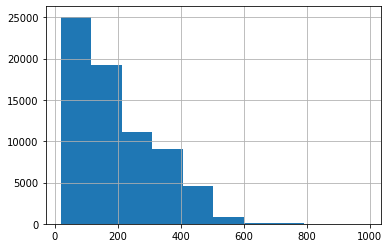

In [10]:
df.num_sold.hist()

In [11]:
df.shape

(70128, 5)

In [12]:
x = df.iloc[:,[0,1,2,3]]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
final = ohe.fit_transform(x.iloc[:,[1,2,3]])
final = pd.DataFrame(final.toarray())
final

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
df

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [14]:
final['Day'] = pd.DatetimeIndex(df['date']).day
final['Month'] = pd.DatetimeIndex(df['date']).month
final['Year'] = pd.DatetimeIndex(df['date']).year
final['quarter'] = df['date'].dt.quarter
final['month'] = df['date'].dt.month
final['day'] = df['date'].dt.day
final['dayofweek'] = df['date'].dt.dayofweek
final['dayofmonth'] = df['date'].dt.days_in_month
final['dayofyear'] = df['date'].dt.dayofyear
final['weekofyear'] = df['date'].dt.weekofyear
final['is_weekend'] = np.where((final['dayofweek'] == 5) | (final['dayofweek'] == 6), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


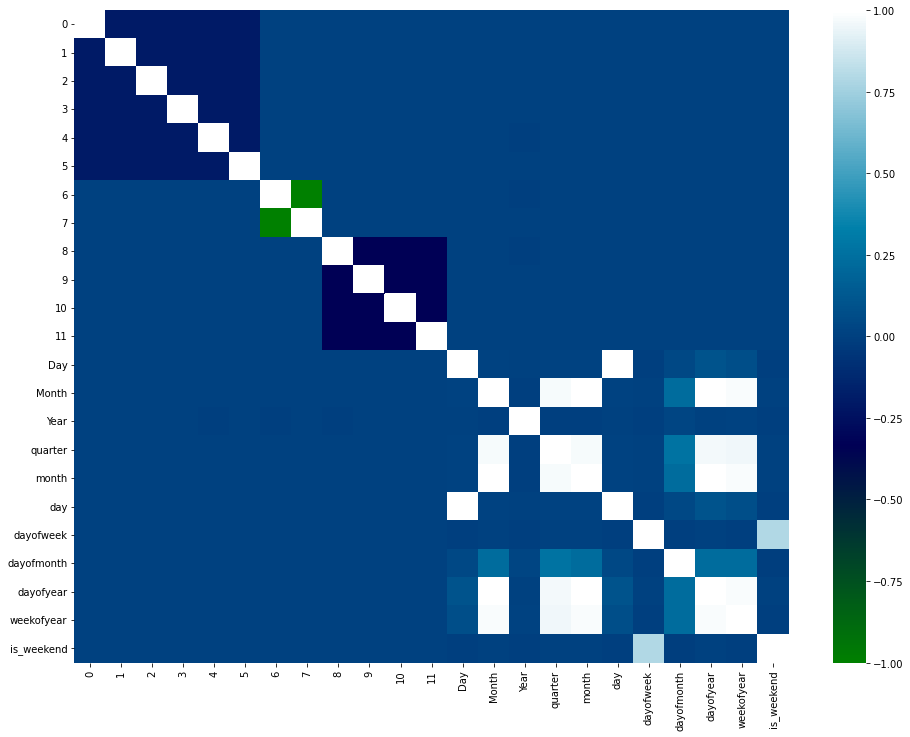

In [47]:
plt.figure(figsize=(16,12))
sns.heatmap(final.corr(),cmap='ocean')

In [16]:
y = df.iloc[:,4]

In [17]:
dd = pd.read_csv("test.csv")

In [18]:
final2 = pd.DataFrame(ohe.fit_transform(dd.iloc[:,[2,3,4]]).toarray())

In [19]:
final2['Day'] = pd.DatetimeIndex(dd['date']).day
final2['Month'] = pd.DatetimeIndex(dd['date']).month
final2['Year'] = pd.DatetimeIndex(dd['date']).year
final2['quarter'] = df['date'].dt.quarter
final2['month'] = df['date'].dt.month
final2['day'] = df['date'].dt.day
final2['dayofweek'] = df['date'].dt.dayofweek
final2['dayofmonth'] = df['date'].dt.days_in_month
final2['dayofyear'] = df['date'].dt.dayofyear
final2['weekofyear'] = df['date'].dt.weekofyear
final2['is_weekend'] = np.where((final2['dayofweek'] == 5) | (final2['dayofweek'] == 6), 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [20]:
final2

,0,1,2,3,4,5,6,7,8,9,...,Month,Year,quarter,month,day,dayofweek,dayofmonth,dayofyear,weekofyear,is_weekend
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,2021,1,1,1,6,31,1,52,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,2021,1,1,1,6,31,1,52,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,2021,1,1,1,6,31,1,52,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,2021,1,1,1,6,31,1,52,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,2021,1,1,1,6,31,1,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12,2021,4,12,31,6,31,365,52,1
17516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12,2021,4,12,31,6,31,365,52,1
17517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,12,2021,4,12,31,6,31,365,52,1
17518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,12,2021,4,12,31,6,31,365,52,1


In [21]:
ss = pd.read_csv("sample_submission.csv")
ss

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100
...,...,...
17515,87643,100
17516,87644,100
17517,87645,100
17518,87646,100


In [22]:
import xgboost

In [23]:
model = xgboost.XGBRegressor()

In [24]:
param_grid = {
    'n_estimators': [400, 700],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

In [33]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor()

In [34]:
rand_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=random_grid,
    n_jobs = 16,
    cv = 2,
    n_iter=50,
    verbose=2
)

In [36]:
rand_search.fit(final,y)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=16,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   verbose=2)

In [37]:
model = rand_search.best_estimator_

In [38]:
model.fit(final,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=130)

In [39]:
red = model.predict(final2)
red = [int(p) for p in red]
submit = pd.DataFrame({"row_id":ss.row_id,"num_sold":red})
submit.to_csv("Submissionrfromd.csv",index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
